In [95]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  Packages & Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import warnings
import statsmodels.api as sm

from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, ShuffleSplit, validation_curve, cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, RobustScaler, LabelEncoder, scale, MinMaxScaler, PolynomialFeatures, Imputer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE,SelectFromModel

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.datasets import make_classification

from xgboost import XGBClassifier 
from xgboost import plot_importance

from scipy.stats import skew, boxcox_normmax
from scipy.special import boxcox1p

warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter('ignore')


In [3]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [4]:
#Load Datasets
train_data = pd.read_csv("training_set_values.csv")
train_labels = pd.read_csv("training_set_labels.csv")
test_data = pd.read_csv("test_set_values.csv")


In [5]:
#Join Labels with Train data
train_labels = train_labels.drop(columns='id')
train_data = train_data.join(train_labels)


In [147]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
test_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
train_data.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
r

In [101]:
#Drop id and recorded from train dataset 
train_data= train_data.drop(columns=['id'])
train_data= train_data.drop(columns=['recorded_by'])


In [148]:
#Drop id and recorded from test dataset 
test_id= test_data['id']
test_data= test_data.drop(columns=['id'])
test_data= test_data.drop(columns=['recorded_by'])

In [103]:
# Differentiate categorical from numerical variables, even though some are encoded already,
num_train_data = train_data[[
# 'id',
'amount_tsh',
'gps_height',
'num_private',
'population',
]]

other_train_data = train_data[[ 
'longitude',
'latitude',
'date_recorded',
]]
    
categorical_columns = list(set(train_data.columns) - set(num_train_data.columns) - set(other_train_data.columns))
cat_train_data = train_data.loc[:,categorical_columns]


In [104]:
train_data.head()


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [105]:
train_data_missing = train_data.isna()
train_data_missing = (train_data_missing.sum()/len(train_data))*100
train_data_missing = train_data_missing[train_data_missing!=0]
train_data_missing

funder                6.119529
installer             6.153199
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.526936
scheme_name          47.417508
permit                5.144781
dtype: float64

In [14]:
column_list = cat_train_data.columns.values.tolist()
print(column_list)

['quantity_group', 'water_quality', 'extraction_type', 'source', 'payment', 'lga', 'basin', 'region', 'funder', 'permit', 'source_type', 'management', 'extraction_type_group', 'waterpoint_type', 'district_code', 'waterpoint_type_group', 'extraction_type_class', 'quality_group', 'public_meeting', 'payment_type', 'quantity', 'wpt_name', 'region_code', 'ward', 'installer', 'scheme_management', 'status_group', 'construction_year', 'subvillage', 'scheme_name', 'management_group', 'source_class']


In [15]:
def unique_values(df):
    for column_name in column_list:
        return print(df[column_name].unique())

In [16]:
for column_name in column_list:
      print(column_name,len(train_data[column_name].unique()),train_data[column_name].unique())


quantity_group 5 ['enough' 'insufficient' 'dry' 'seasonal' 'unknown']
water_quality 8 ['soft' 'salty' 'milky' 'unknown' 'fluoride' 'coloured' 'salty abandoned'
 'fluoride abandoned']
extraction_type 18 ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
source 10 ['spring' 'rainwater harvesting' 'dam' 'machine dbh' 'other'
 'shallow well' 'river' 'hand dtw' 'lake' 'unknown']
payment 7 ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']
lga 125 ['Ludewa' 'Serengeti' 'Simanjiro' 'Nanyumbu' 'Karagwe' 'Mkinga'
 'Shinyanga Rural' 'Kahama' 'Tabora Urban' 'Mkuranga' 'Namtumbo' 'Maswa'
 'Siha' 'Meatu' 'Sumbawanga Rural' 'Njombe' 'Ukerewe' 'Bariadi' 'Same'
 'Kigoma Rural' 'Moshi Rural' 'Lindi Rural' 'Rombo' 'Chamwino' 'Bagamoyo'
 'Mafia' 'Arusha Rural' 'Kyela' 'K

In [17]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[[
'installer',
'funder',
'scheme_name',
'ward',
'lga',
'wpt_name',
'subvillage'
]]

In [18]:
for i in grouping_col.columns:
    inspect = grouping_col[i].value_counts()/len(grouping_col)
    print(inspect.head(10))

DWE                   0.292963
Government            0.030724
RWE                   0.020303
Commu                 0.017845
DANIDA                0.017677
KKKT                  0.015118
Hesawa                0.014141
0                     0.013081
TCRS                  0.011902
Central government    0.010471
Name: installer, dtype: float64
Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
Kkkt                      0.021667
World Vision              0.020976
Unicef                    0.017795
Tasaf                     0.014764
District Council          0.014192
Name: funder, dtype: float64
K                              0.011481
None                           0.010842
Borehole                       0.009192
Chalinze wate                  0.006818
M                              0.006734
DANIDA                         0.006380
Government                     0.005387

#  Exploratory Data Analysis 

Text(0, 0.5, 'Percentage')

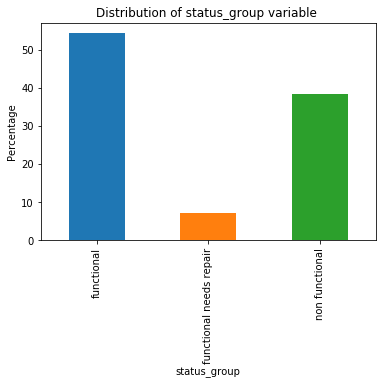

In [19]:
plt.pyplot.show()
ax = ((train_data.status_group.value_counts().sort_index()/len(train_data))*100).plot(kind='bar')
plt.pyplot.title('Distribution of status_group variable ')
plt.pyplot.xlabel('status_group')
plt.pyplot.ylabel('Percentage')

In [20]:
functional = len(train_data[train_data['status_group']=='functional'])
func_need_repair = len(train_data[train_data['status_group']=='functional needs repair'])
non_func = len(train_data[train_data['status_group']=='non functional'])

pct_functional = functional/(functional+func_need_repair+non_func)
print("percentage of functional is", pct_functional*100)
pct_func_need_repair = func_need_repair/(functional+func_need_repair+non_func)
print("percentage of functional needs repair", pct_func_need_repair*100)
pct_non_func = non_func/(functional+func_need_repair+non_func)
print("percentage of non functional", pct_non_func*100)

percentage of functional is 54.3080808080808
percentage of functional needs repair 7.267676767676767
percentage of non functional 38.42424242424242


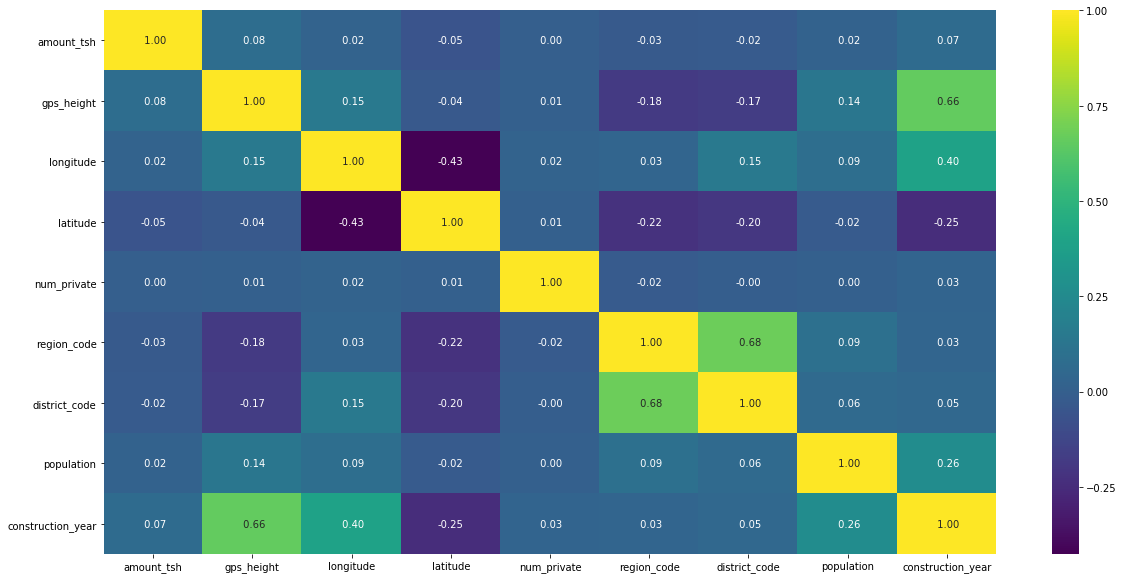

In [21]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

Text(0, 0.5, 'Percentage')

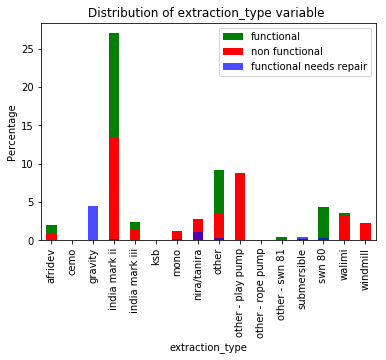

In [22]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type')
((train_data[train_data.status_group=='non functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type')
((train_data[train_data.status_group=='functional needs repair'].extraction_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type variable ')
plt.pyplot.xlabel('extraction_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

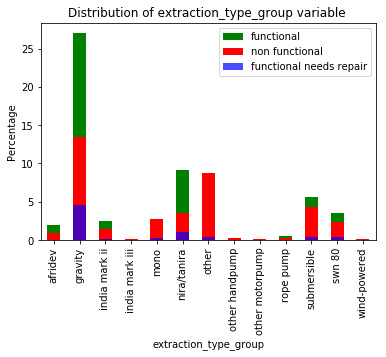

In [23]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_group')
((train_data[train_data.status_group=='non functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_group')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_group variable ')
plt.pyplot.xlabel('extraction_type_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

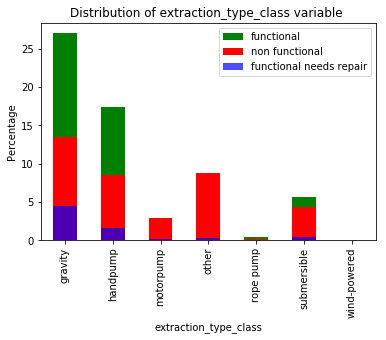

In [24]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_class')
((train_data[train_data.status_group=='non functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='extraction_type_class')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='extraction_type_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of extraction_type_class variable ')
plt.pyplot.xlabel('extraction_type_class')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

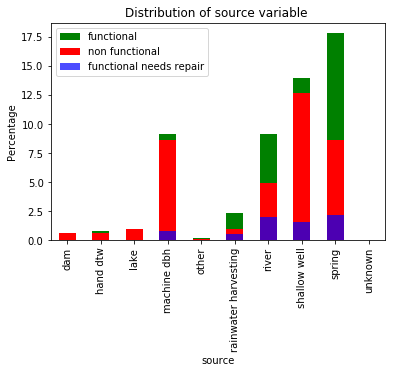

In [25]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source')
((train_data[train_data.status_group=='non functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source')
((train_data[train_data.status_group=='functional needs repair'].source.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source variable ')
plt.pyplot.xlabel('source')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

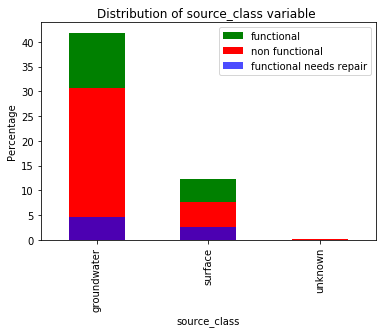

In [26]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_class')
((train_data[train_data.status_group=='non functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_class')
((train_data[train_data.status_group=='functional needs repair'].source_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_class variable ')
plt.pyplot.xlabel('source_class')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

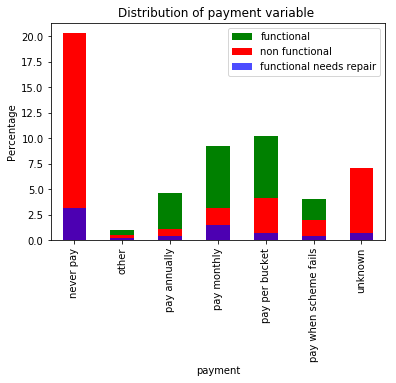

In [27]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment')
((train_data[train_data.status_group=='non functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment')
((train_data[train_data.status_group=='functional needs repair'].payment.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment variable ')
plt.pyplot.xlabel('payment')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

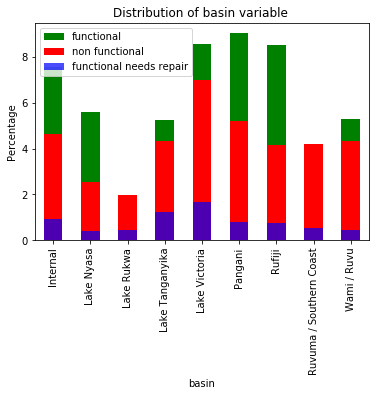

In [28]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='basin')
((train_data[train_data.status_group=='non functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='basin')
((train_data[train_data.status_group=='functional needs repair'].basin.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='basin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of basin variable ')
plt.pyplot.xlabel('basin')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

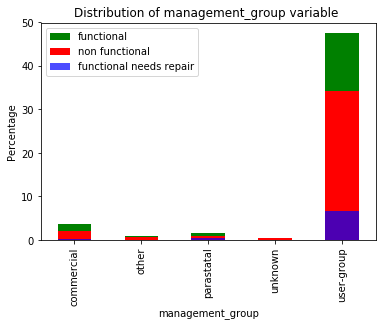

In [29]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management_group')
((train_data[train_data.status_group=='non functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management_group')
((train_data[train_data.status_group=='functional needs repair'].management_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management_group variable ')
plt.pyplot.xlabel('management_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

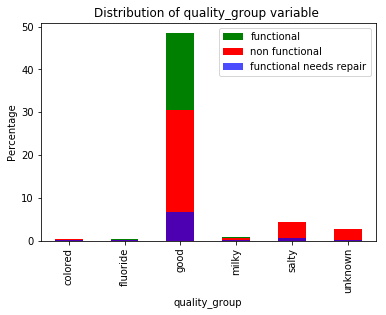

In [30]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

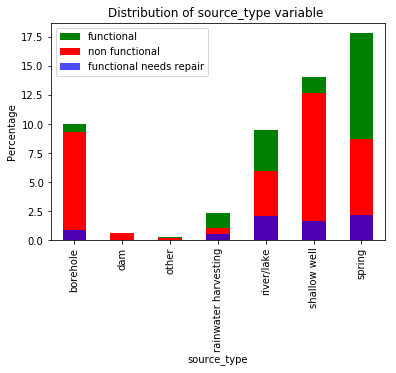

In [31]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_type')
((train_data[train_data.status_group=='non functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_type')
((train_data[train_data.status_group=='functional needs repair'].source_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of source_type variable ')
plt.pyplot.xlabel('source_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

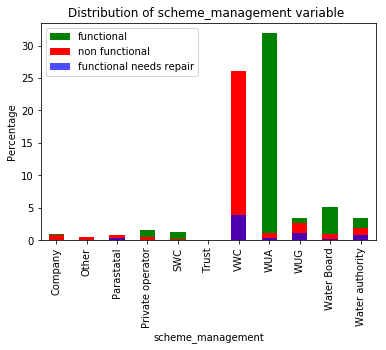

In [32]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='scheme_management')
((train_data[train_data.status_group=='non functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='scheme_management')
((train_data[train_data.status_group=='functional needs repair'].scheme_management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='scheme_management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of scheme_management variable ')
plt.pyplot.xlabel('scheme_management')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

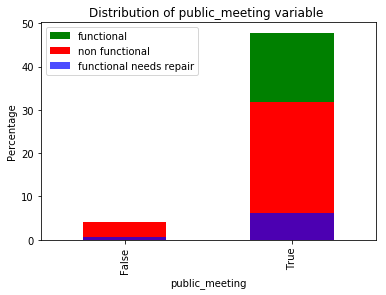

In [33]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='public_meeting')
((train_data[train_data.status_group=='non functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='public_meeting')
((train_data[train_data.status_group=='functional needs repair'].public_meeting.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='public_meeting')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of public_meeting variable ')
plt.pyplot.xlabel('public_meeting')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

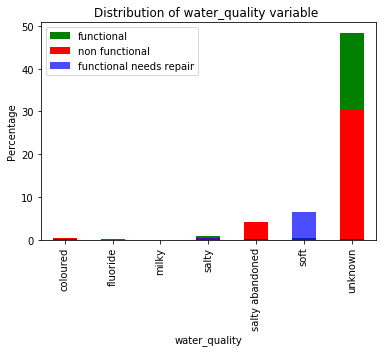

In [34]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='water_quality')
((train_data[train_data.status_group=='non functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='water_quality')
((train_data[train_data.status_group=='functional needs repair'].water_quality.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='water_quality')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of water_quality variable ')
plt.pyplot.xlabel('water_quality')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

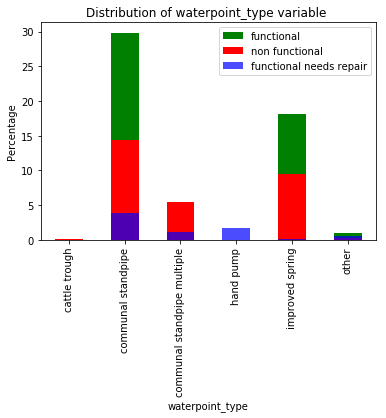

In [35]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type')
((train_data[train_data.status_group=='non functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type variable ')
plt.pyplot.xlabel('waterpoint_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

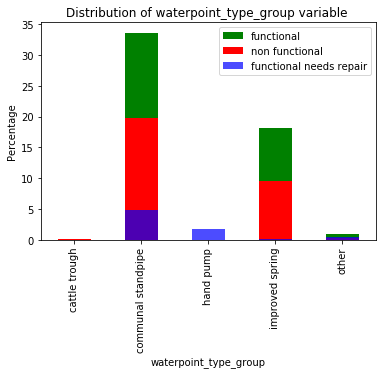

In [36]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type_group')
((train_data[train_data.status_group=='non functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type_group')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of waterpoint_type_group variable ')
plt.pyplot.xlabel('waterpoint_type_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

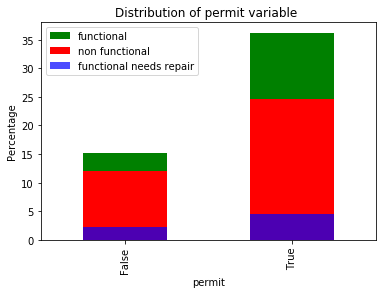

In [37]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='permit')
((train_data[train_data.status_group=='non functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='permit')
((train_data[train_data.status_group=='functional needs repair'].permit.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='permit')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of permit variable ')
plt.pyplot.xlabel('permit')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

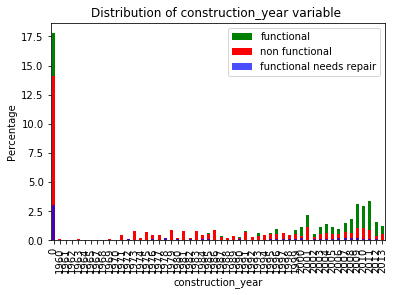

In [38]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='construction_year')
((train_data[train_data.status_group=='non functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='construction_year')
((train_data[train_data.status_group=='functional needs repair'].construction_year.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='construction_year')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of construction_year variable ')
plt.pyplot.xlabel('construction_year')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

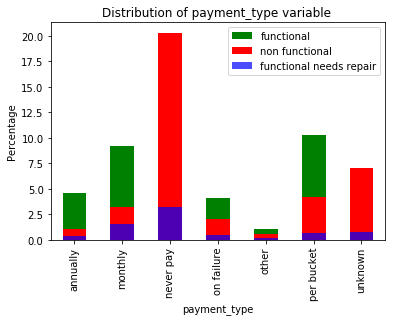

In [39]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment_type')
((train_data[train_data.status_group=='non functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment_type')
((train_data[train_data.status_group=='functional needs repair'].payment_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='payment_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of payment_type variable ')
plt.pyplot.xlabel('payment_type')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

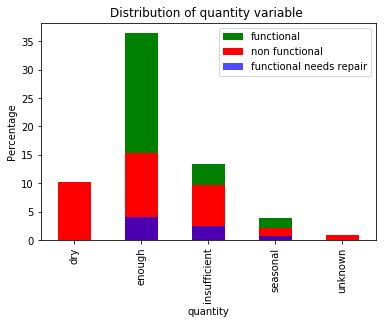

In [40]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quantity')
((train_data[train_data.status_group=='non functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quantity')
((train_data[train_data.status_group=='functional needs repair'].quantity.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quantity')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quantity variable ')
plt.pyplot.xlabel('quantity')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

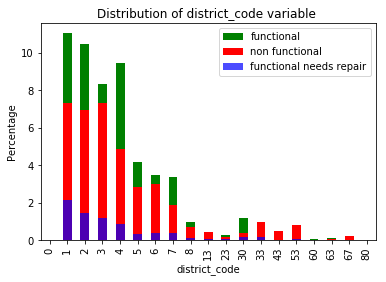

In [41]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='district_code')
((train_data[train_data.status_group=='non functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='district_code')
((train_data[train_data.status_group=='functional needs repair'].district_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='district_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of district_code variable ')
plt.pyplot.xlabel('district_code')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

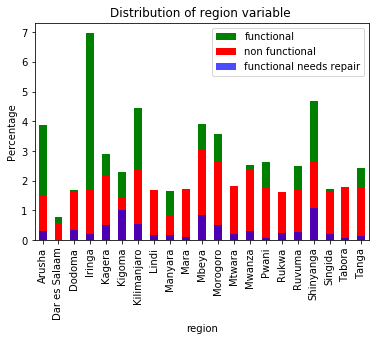

In [42]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region')
((train_data[train_data.status_group=='non functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region')
((train_data[train_data.status_group=='functional needs repair'].region.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region variable ')
plt.pyplot.xlabel('region')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

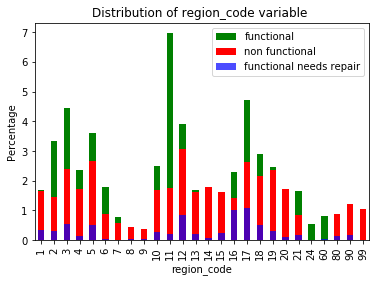

In [43]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region_code')
((train_data[train_data.status_group=='non functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region_code')
((train_data[train_data.status_group=='functional needs repair'].region_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of region_code variable ')
plt.pyplot.xlabel('region_code')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

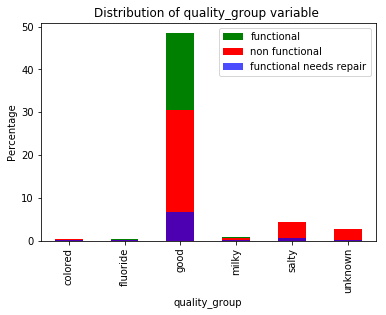

In [44]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of quality_group variable ')
plt.pyplot.xlabel('quality_group')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

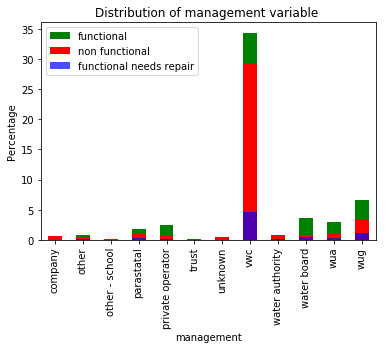

In [45]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management')
((train_data[train_data.status_group=='non functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management')
((train_data[train_data.status_group=='functional needs repair'].management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of management variable ')
plt.pyplot.xlabel('management')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

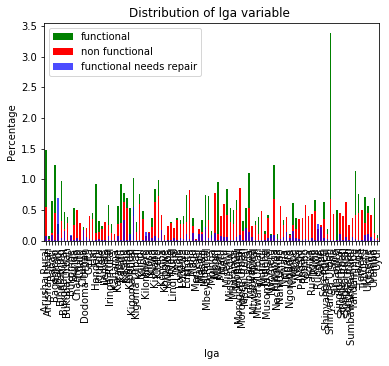

In [46]:
plt.pyplot.show()
ax = ((train_data[train_data.status_group=='functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='lga')
((train_data[train_data.status_group=='non functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='lga')
((train_data[train_data.status_group=='functional needs repair'].lga.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='lga')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of lga variable ')
plt.pyplot.xlabel('lga')
plt.pyplot.ylabel('Percentage')

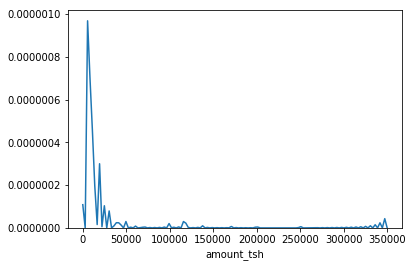

In [47]:
sns.distplot(train_data['amount_tsh'], hist = False, kde = True)


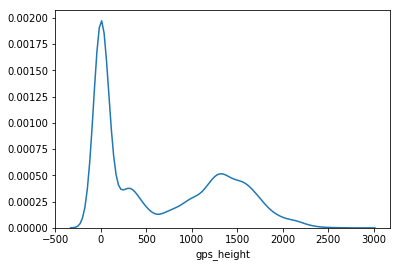

In [48]:
sns.distplot(train_data['gps_height'], hist = False, kde = True)

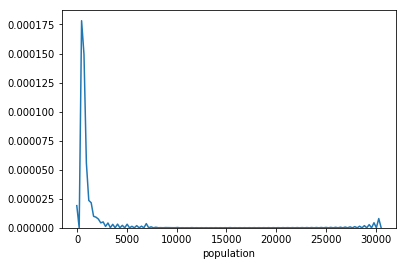

In [49]:
sns.distplot(train_data['population'], hist = False, kde = True)

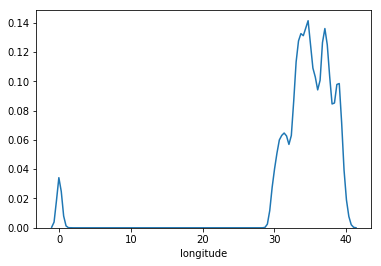

In [50]:
sns.distplot(train_data['longitude'], hist = False, kde = True)

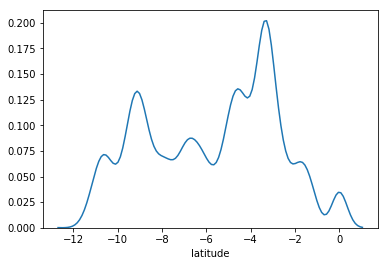

In [51]:
sns.distplot(train_data['latitude'], hist = False, kde = True)

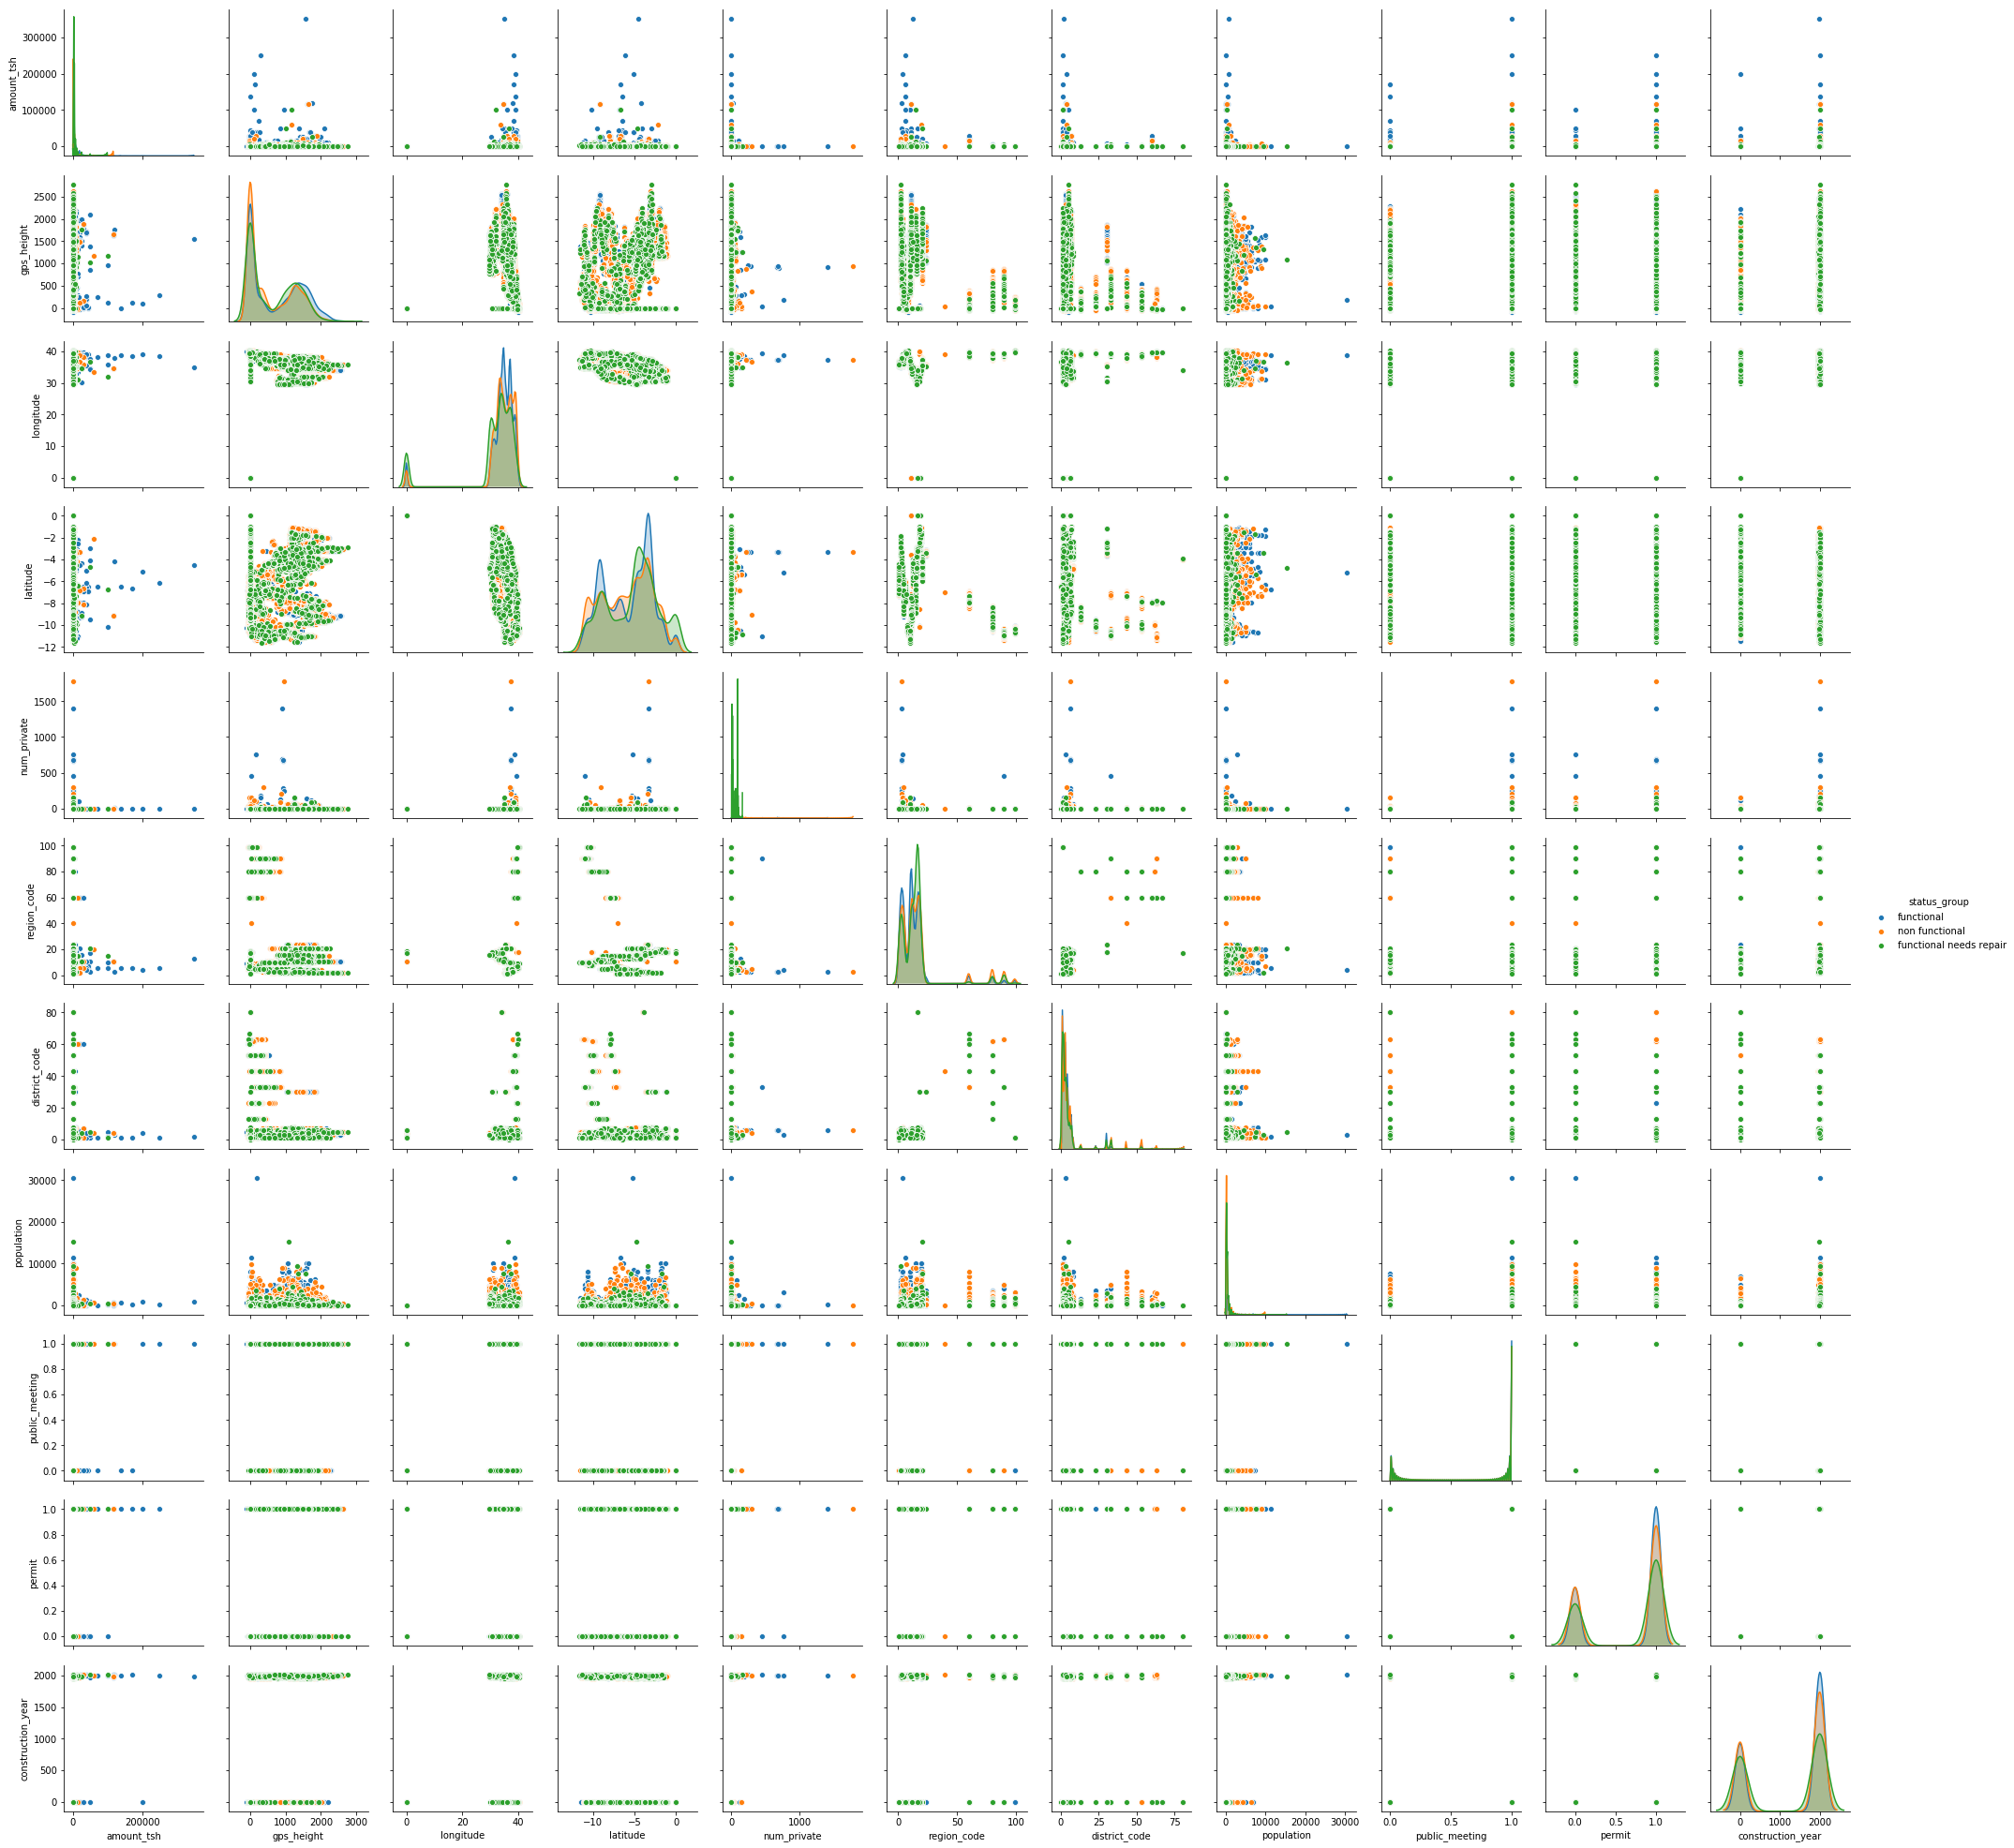

In [52]:
sns.pairplot(train_data, hue="status_group")

# Data Preparation Proposals
Keeping all transformations in the same cell in an effort to make easy to recreate all steps for the Test set

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
scheme_management        55523 non-null object


In [107]:
train_data['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

Transform Training Dataset

In [108]:
# train_temp = train_data.copy()

# # installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
# def replace(x):
#     if x in list(['DWE', 'Government','RWE','Commu','DANIDA']):
#         return x
#     else:
#         return 'other'
# train_temp.installer = train_temp.installer.map(replace)

# # funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
# def replace(x):
#     if x in list(['Government Of Tanzania',
# 'Danida',
# 'Hesawa',
# 'Rwssp',
# 'World Bank',
# 'Kkkt',
# 'World Vision',
# 'Unicef',
# 'Tasaf',
# 'District Council']):
#         return x
#     else:
#         return 'other'
# train_temp.funder = train_temp.funder.map(replace)

# # lga - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
# def replace(x):
#     if x in list(['Njombe',
# 'Arusha Rural',
# 'Moshi Rural',
# 'Bariadi',
# 'Rungwe',
# 'Kilosa',
# 'Kasulu',
# 'Mbozi',
# 'Meru',
# 'Bagamoyo']):
#         return x
#     else:
#         return 'other'
# train_temp.lga = train_temp.lga.map(replace)


# #Eliminate scheme_name from the dataset.
# train_temp= train_temp.drop(columns=['scheme_name'])

# # Eliminate ward from dataset
# train_temp= train_temp.drop(columns=['ward'])

# # Eliminate wpt_name from dataset#
# train_temp= train_temp.drop(columns=['wpt_name'])

# # Eliminate subvillage from dataset#
# train_temp= train_temp.drop(columns=['subvillage'])

# #Choose Between Region and Region_Code and District Code
# #train_temp= train_temp.drop(columns=['region'])
# #train_temp= train_temp.drop(columns=['region_code'])
# #train_temp= train_temp.drop(columns=['district_code'])

# #Construction Year, Bin values per decade --- Note: that (-1, 1960] is the same as Unknown
# year_bins = [-1, 1960, 1990, 2015]
# train_temp['construction_year_bin'] = pd.cut(train_temp.construction_year,year_bins,labels=False, retbins=False, right=False)
# train_temp['construction_year_bin'] = train_temp["construction_year_bin"].astype('category') 
# train_temp= train_temp.drop(columns=['construction_year'])

# #how to treat, date_recorded?
# train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
# train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
# train_temp.date_recorded = pd.datetime(2014, 1, 1) - pd.to_datetime(train_temp.date_recorded)
# train_temp.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_temp.columns]
# train_temp.days_since_recorded = train_temp.days_since_recorded.astype('timedelta64[D]').astype(int)

# recorded_bins = [1, 500, 1000, 2000, 4100]
# train_temp['days_since_recorded_bin'] = pd.cut(train_temp.days_since_recorded,recorded_bins,labels=False, retbins=False, right=False)
# train_temp['days_since_recorded_bin'] = train_temp["days_since_recorded_bin"].astype('category') 

# #Is longitude and Latitude relevant to the model
# # train_temp= train_temp.drop(columns=['longitude'])
# # train_temp= train_temp.drop(columns=['latitude'])

# #Decide between waterpoint_type & waterpoint_type_group
# # train_temp= train_temp.drop(columns=['waterpoint_type'])
# # train_temp= train_temp.drop(columns=['waterpoint_type_group'])

# #Decide between extraction_type & extraction_type_group & extraction_type_class
# # train_temp= train_temp.drop(columns=['extraction_type'])
# # train_temp= train_temp.drop(columns=['extraction_type_group'])
# # train_temp= train_temp.drop(columns=['extraction_type_class'])



In [129]:
train_temp = train_data.copy()

#amount_tsh impute Functional value 0 for mean
amount_func_mean = train_temp.amount_tsh[train_temp.status_group == 'functional'].mean()
amount_func_median = train_temp.amount_tsh[train_temp.status_group == 'functional'].median()

#amount_tsh impute Functional Needs repair value 0 for mean
amount_repair_mean = train_temp.amount_tsh[train_temp.status_group == 'functional needs repair'].mean()
amount_repair_median = train_temp.amount_tsh[train_temp.status_group == 'functional needs repair'].median()

#Impute values 0 with mean from amount_tsh where status_group == 'functional'
train_temp.amount_tsh[train_temp.status_group == 'functional'] = train_temp.amount_tsh.replace(0, amount_func_mean)

#Impute values 0 with mean from amount_tsh where status_group == 'functional'
train_temp.amount_tsh[train_temp.status_group == 'functional needs repair'] = train_temp.amount_tsh.replace(0, amount_repair_mean)

# installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['DWE', 'Government','RWE','Commu','DANIDA']):
        return x
    else:
        return 'other'
train_temp.installer = train_temp.installer.map(replace)

# funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Government Of Tanzania',
'Danida',
'Hesawa',
'Rwssp',
'World Bank',
'Kkkt',
'World Vision',
'Unicef',
'Tasaf',
'District Council']):
        return x
    else:
        return 'other'
train_temp.funder = train_temp.funder.map(replace)

# lga - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Njombe',
'Arusha Rural',
'Moshi Rural',
'Bariadi',
'Rungwe',
'Kilosa',
'Kasulu',
'Mbozi',
'Meru',
'Bagamoyo']):
        return x
    else:
        return 'other'
train_temp.lga = train_temp.lga.map(replace)


#Eliminate scheme_name from the dataset.
train_temp= train_temp.drop(columns=['scheme_name'])

# Eliminate ward from dataset
train_temp= train_temp.drop(columns=['ward'])

# Eliminate wpt_name from dataset#
train_temp= train_temp.drop(columns=['wpt_name'])

# Eliminate subvillage from dataset#
train_temp= train_temp.drop(columns=['subvillage'])

#Choose Between Region and Region_Code and District Code
#train_temp= train_temp.drop(columns=['region'])
#train_temp= train_temp.drop(columns=['region_code'])
#train_temp= train_temp.drop(columns=['district_code'])

#Construction Year, Bin values per decade --- Note: that (-1, 1960] is the same as Unknown
#year_bins = [-1, 1960, 1990, 2015]
#train_temp['construction_year_bin'] = pd.cut(train_temp.construction_year,year_bins,labels=False, retbins=False, right=False)
#train_temp['construction_year_bin'] = train_temp["construction_year_bin"].astype('category') 
#train_temp= train_temp.drop(columns=['construction_year'])

#how to treat, date_recorded?
train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
train_temp.date_recorded = pd.to_datetime(train_temp.date_recorded)
train_temp.date_recorded = pd.datetime(2014, 1, 1) - pd.to_datetime(train_temp.date_recorded)
train_temp.columns = ['days_since_recorded' if x=='date_recorded' else x for x in train_temp.columns]
train_temp.days_since_recorded = train_temp.days_since_recorded.astype('timedelta64[D]').astype(int)

#recorded_bins = [1, 500, 1000, 2000, 4100]
#train_temp['days_since_recorded_bin'] = pd.cut(train_temp.days_since_recorded,recorded_bins,labels=False, retbins=False, right=False)
#train_temp['days_since_recorded_bin'] = train_temp["days_since_recorded_bin"].astype('category') 

#Is longitude and Latitude relevant to the model
# train_temp= train_temp.drop(columns=['longitude'])
# train_temp= train_temp.drop(columns=['latitude'])

#Decide between waterpoint_type & waterpoint_type_group
# train_temp= train_temp.drop(columns=['waterpoint_type'])
# train_temp= train_temp.drop(columns=['waterpoint_type_group'])

#Decide between extraction_type & extraction_type_group & extraction_type_class
# train_temp= train_temp.drop(columns=['extraction_type'])
# train_temp= train_temp.drop(columns=['extraction_type_group'])
# train_temp= train_temp.drop(columns=['extraction_type_class'])



In [154]:
test_temp = test_data.copy()

#amount_tsh impute Functional value 0 for mean
amount_func_mean = test_temp.amount_tsh[test_temp.status_group == 'functional'].mean()
amount_func_median = test_temp.amount_tsh[test_temp.status_group == 'functional'].median()

#amount_tsh impute Functional Needs repair value 0 for mean
amount_repair_mean = test_temp.amount_tsh[test_temp.status_group == 'functional needs repair'].mean()
amount_repair_median = test_temp.amount_tsh[test_temp.status_group == 'functional needs repair'].median()

#Impute values 0 with mean from amount_tsh where status_group == 'functional'
test_temp.amount_tsh[test_temp.status_group == 'functional'] = test_temp.amount_tsh.replace(0, amount_func_mean)

#Impute values 0 with mean from amount_tsh where status_group == 'functional'
test_temp.amount_tsh[test_temp.status_group == 'functional needs repair'] = test_temp.amount_tsh.replace(0, amount_repair_mean)

# installer - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['DWE', 'Government','RWE','Commu','DANIDA']):
        return x
    else:
        return 'other'
test_temp.installer = test_temp.installer.map(replace)

# funder - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Government Of Tanzania',
'Danida',
'Hesawa',
'Rwssp',
'World Bank',
'Kkkt',
'World Vision',
'Unicef',
'Tasaf',
'District Council']):
        return x
    else:
        return 'other'
test_temp.funder = test_temp.funder.map(replace)

# lga - shortlist of the 5 higher and category other, note that nulls will be included in this criteria.
def replace(x):
    if x in list(['Njombe',
'Arusha Rural',
'Moshi Rural',
'Bariadi',
'Rungwe',
'Kilosa',
'Kasulu',
'Mbozi',
'Meru',
'Bagamoyo']):
        return x
    else:
        return 'other'
test_temp.lga = test_temp.lga.map(replace)


#Eliminate scheme_name from the dataset.
test_temp= test_temp.drop(columns=['scheme_name'])

# Eliminate ward from dataset
test_temp= test_temp.drop(columns=['ward'])

# Eliminate wpt_name from dataset#
test_temp= test_temp.drop(columns=['wpt_name'])

# Eliminate subvillage from dataset#
test_temp= test_temp.drop(columns=['subvillage'])

#Choose Between Region and Region_Code and District Code
#test_temp= test_temp.drop(columns=['region'])
#test_temp= test_temp.drop(columns=['region_code'])
#test_temp= test_temp.drop(columns=['district_code'])

#Construction Year, Bin values per decade --- Note: that (-1, 1960] is the same as Unknown
#year_bins = [-1, 1960, 1990, 2015]
#test_temp['construction_year_bin'] = pd.cut(test_temp.construction_year,year_bins,labels=False, retbins=False, right=False)
#test_temp['construction_year_bin'] = test_temp["construction_year_bin"].astype('category') 
#test_temp= test_temp.drop(columns=['construction_year'])

#how to treat, date_recorded?
test_temp.date_recorded = pd.to_datetime(test_temp.date_recorded)
test_temp.date_recorded = pd.to_datetime(test_temp.date_recorded)
test_temp.date_recorded = pd.datetime(2014, 1, 1) - pd.to_datetime(test_temp.date_recorded)
test_temp.columns = ['days_since_recorded' if x=='date_recorded' else x for x in test_temp.columns]
test_temp.days_since_recorded = test_temp.days_since_recorded.astype('timedelta64[D]').astype(int)

#recorded_bins = [1, 500, 1000, 2000, 4100]
#test_temp['days_since_recorded_bin'] = pd.cut(test_temp.days_since_recorded,recorded_bins,labels=False, retbins=False, right=False)
#test_temp['days_since_recorded_bin'] = test_temp["days_since_recorded_bin"].astype('category') 

#Is longitude and Latitude relevant to the model
# test_temp= test_temp.drop(columns=['longitude'])
# test_temp= test_temp.drop(columns=['latitude'])

#Decide between waterpoint_type & waterpoint_type_group
# test_temp= test_temp.drop(columns=['waterpoint_type'])
# test_temp= test_temp.drop(columns=['waterpoint_type_group'])

#Decide between extraction_type & extraction_type_group & extraction_type_class
# test_temp= test_temp.drop(columns=['extraction_type'])
# test_temp= test_temp.drop(columns=['extraction_type_group'])
# test_temp= test_temp.drop(columns=['extraction_type_class'])



AttributeError: 'DataFrame' object has no attribute 'status_group'

Transform Train Data types

In [59]:
train_temp['district_code'] = train_temp["district_code"].astype('category') 
train_temp['region_code'] = train_temp["region_code"].astype('category') 

train_temp['funder'] = train_temp["funder"].astype('category') 
train_temp['installer'] = train_temp["installer"].astype('category') 
train_temp['lga'] = train_temp["lga"].astype('category') 

Transform Test Data types

In [149]:
test_temp['district_code'] = test_temp["district_code"].astype('category') 
test_temp['region_code'] = test_temp["region_code"].astype('category') 

test_temp['funder'] = test_temp["funder"].astype('category') 
test_temp['installer'] = test_temp["installer"].astype('category') 
test_temp['lga'] = test_temp["lga"].astype('category') 

In [150]:
len(test_temp.columns)

35

In [151]:
len(train_temp.columns)

34

In [152]:
test_temp.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'construction_year_bin', 'days_since_recorded_bin'],
      dtype='object')

In [153]:
train_temp.columns

Index(['amount_tsh', 'days_since_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'population', 'public_meeting',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [61]:
# # Differentiate categorical from numerical variables

# target = train_temp[['status_group']]

# num_train_temp = train_temp[[
# 'amount_tsh',
# 'gps_height',
# 'num_private',
# 'population',
# 'days_since_recorded']]

# #Other are those fields under review that require further discussion
# other_train_temp = train_temp[[ 
# 'longitude',
# 'latitude',
# 'funder',
# 'lga',
# 'installer',
# ]]
    
# categorical_columns = list(set(train_temp.columns) - set(num_train_temp.columns) - set(other_train_temp.columns))
# cat_train_temp = train_temp.loc[:,categorical_columns]


In [135]:
def numerical_features(df):
    columns = df.columns
    return df._get_numeric_data().columns

def categorical_features(df):
    numerical_columns = numerical_features(df)
    return(list(set(df.columns) - set(numerical_columns)))

def onehot_encode(df):
    numericals = df.get(numerical_features(df))
    new_df = numericals.copy()
    for categorical_column in categorical_features(df):
        new_df = pd.concat([new_df, 
                            pd.get_dummies(df[categorical_column], 
                                           prefix=categorical_column)], 
                           axis=1)
    return new_df

# Data Preparation Exploratory Analysis

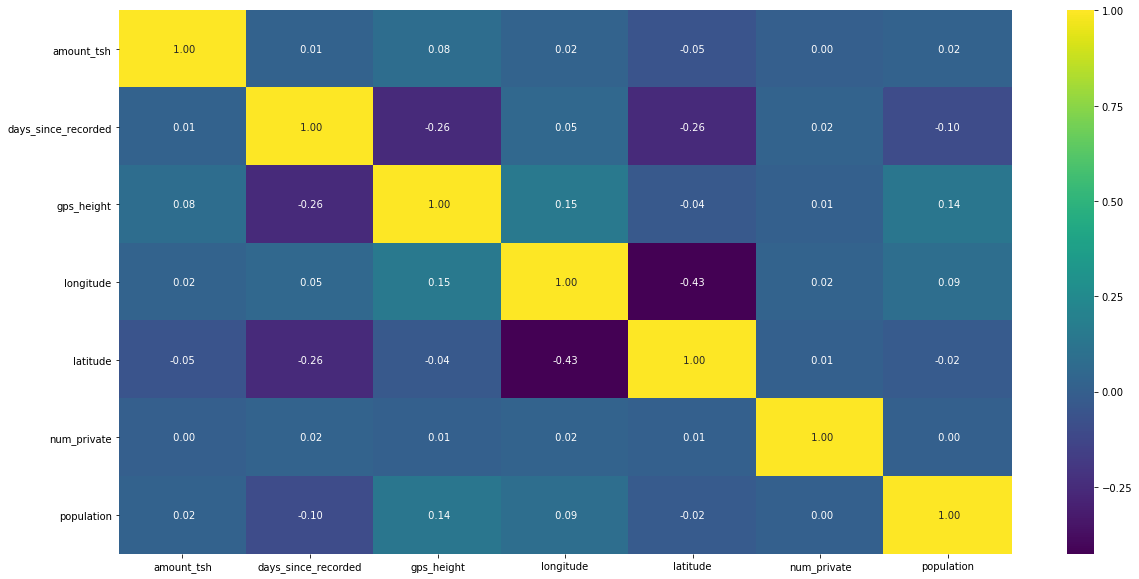

In [64]:
plt.pyplot.figure(figsize=(20,10))
sns.heatmap(train_temp.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

Text(0, 0.5, 'Percentage')

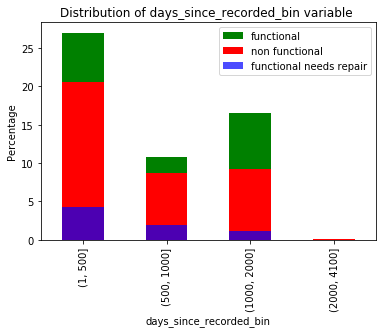

In [65]:
plt.pyplot.show()
ax = ((train_temp[train_temp.status_group=='functional'].days_since_recorded_bin.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='g', x='days_since_recorded_bin')
((train_temp[train_temp.status_group=='non functional'].days_since_recorded_bin.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='r', x='days_since_recorded_bin')
((train_temp[train_temp.status_group=='functional needs repair'].days_since_recorded_bin.value_counts().sort_index()/len(train_temp.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='days_since_recorded_bin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of days_since_recorded_bin variable ')
plt.pyplot.xlabel('days_since_recorded_bin')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

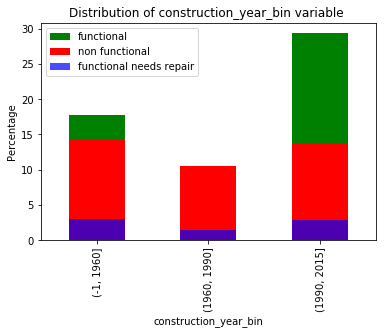

In [66]:
plt.pyplot.show()
ax = ((train_temp[train_temp.status_group=='functional'].construction_year_bin.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='g', x='construction_year_bin')
((train_temp[train_temp.status_group=='non functional'].construction_year_bin.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='r', x='construction_year_bin')
((train_temp[train_temp.status_group=='functional needs repair'].construction_year_bin.value_counts().sort_index()/len(train_temp.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='construction_year_bin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of construction_year_bin variable ')
plt.pyplot.xlabel('construction_year_bin')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

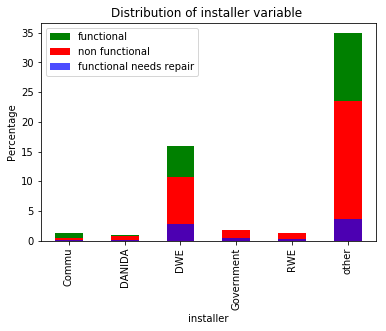

In [67]:
plt.pyplot.show()
ax = ((train_temp[train_temp.status_group=='functional'].installer.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='g', x='installer')
((train_temp[train_temp.status_group=='non functional'].installer.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='r', x='installer')
((train_temp[train_temp.status_group=='functional needs repair'].installer.value_counts().sort_index()/len(train_temp.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='installer')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of installer variable ')
plt.pyplot.xlabel('installer')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

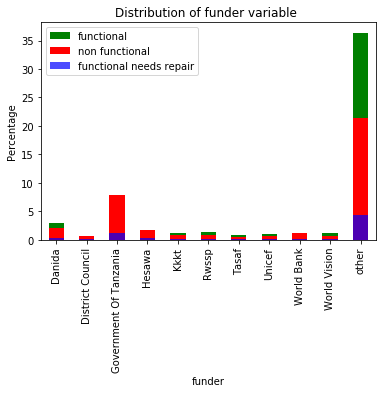

In [68]:
plt.pyplot.show()
ax = ((train_temp[train_temp.status_group=='functional'].funder.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='g', x='funder')
((train_temp[train_temp.status_group=='non functional'].funder.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='r', x='funder')
((train_temp[train_temp.status_group=='functional needs repair'].funder.value_counts().sort_index()/len(train_temp.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='funder')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of funder variable ')
plt.pyplot.xlabel('funder')
plt.pyplot.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

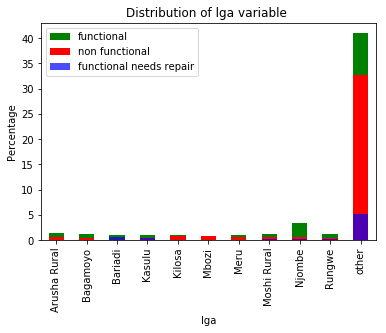

In [69]:
plt.pyplot.show()
ax = ((train_temp[train_temp.status_group=='functional'].lga.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='g', x='lga')
((train_temp[train_temp.status_group=='non functional'].lga.value_counts().sort_index()/len(train_temp.status_group))*100).plot(kind='bar',color='r', x='lga')
((train_temp[train_temp.status_group=='functional needs repair'].lga.value_counts().sort_index()/len(train_temp.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='lga')
ax.legend(["functional", "non functional","functional needs repair"])
plt.pyplot.title('Distribution of lga variable ')
plt.pyplot.xlabel('lga')
plt.pyplot.ylabel('Percentage')

# Baseline Model

In [131]:
#Segregate trainning labels from data set 
train_temp.status_group.replace(['functional', 'non functional','functional needs repair'], [1, 2, 3], inplace=True)
train_labels = train_temp['status_group']
train_temp= train_temp.drop(columns=['status_group'])

In [132]:
train_temp.head()

,amount_tsh,days_since_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,region,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.000000,1024,other,1390,other,34.938093,-9.856322,0,Lake Nyasa,Iringa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,461.798235,301,other,1399,other,34.698766,-2.147466,0,Lake Victoria,Mara,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,25.000000,310,other,686,other,37.460664,-3.821329,0,Pangani,Manyara,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,0.000000,338,Unicef,263,other,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mtwara,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,461.798235,903,other,0,other,31.130847,-1.825359,0,Lake Victoria,Kagera,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [138]:
#Data frames before the baseline
train_set = onehot_encode(train_temp)
test_set = onehot_encode(test_temp)

In [144]:
list(train_set.columns)

['amount_tsh',
 'days_since_recorded',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'region_code',
 'district_code',
 'population',
 'construction_year',
 'extraction_type_class_gravity',
 'extraction_type_class_handpump',
 'extraction_type_class_motorpump',
 'extraction_type_class_other',
 'extraction_type_class_rope pump',
 'extraction_type_class_submersible',
 'extraction_type_class_wind-powered',
 'management_company',
 'management_other',
 'management_other - school',
 'management_parastatal',
 'management_private operator',
 'management_trust',
 'management_unknown',
 'management_vwc',
 'management_water authority',
 'management_water board',
 'management_wua',
 'management_wug',
 'water_quality_coloured',
 'water_quality_fluoride',
 'water_quality_fluoride abandoned',
 'water_quality_milky',
 'water_quality_salty',
 'water_quality_salty abandoned',
 'water_quality_soft',
 'water_quality_unknown',
 'management_group_commercial',
 'management_group_other',
 'manageme

Train / Test Split

In [139]:
train_labels
train_set

X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, train_size=0.8)

Random Forest 

In [140]:
# Randon Forest - Under 2 minutes
rf = RFC(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test,y_test)

print('Accuracy:', rf_score)

Accuracy: 0.9422558922558922


In [141]:
# XGBoost - Under 4 minutes Simple Model / Complex 25 min

# xgb_model = XGBClassifier(objective="multi:softprob", random_state=42)
# xgb_model = XGBClassifier(silent=False, 
#                       scale_pos_weight=1,
#                       learning_rate=0.1,  
#                       colsample_bytree = 0.4,
#                       subsample = 0.8,
#                       objective='multi:softprob', 
#                       n_estimators=1000, 
#                       reg_alpha = 0.3,
#                       max_depth=4, 
#                       gamma=10)
xgb_model = XGBClassifier(objective="multi:softprob",
                      learning_rate= 0.075,
                      max_depth= 6,
                      min_samples_leaf= 16,
                      subsample= 0.8,
                      max_features= 1.0,
                      n_estimators= 1000,
                      gamma=1)

xgb_model.fit(X_train, y_train)

xgb_score = xgb_model.score(X_test,y_test)

print('Accuracy:', xgb_score)

Accuracy: 0.9494949494949495


In [76]:
eval_set = [(X_train, y_train), (X_test, y_test)]
#eval_metric = ["auc","error"]
eval_metric = "mlogloss"
%time xgb_model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:1.04709	validation_1-mlogloss:1.04655
[1]	validation_0-mlogloss:1.00358	validation_1-mlogloss:1.00252
[2]	validation_0-mlogloss:0.966451	validation_1-mlogloss:0.964822
[3]	validation_0-mlogloss:0.934182	validation_1-mlogloss:0.932277
[4]	validation_0-mlogloss:0.906228	validation_1-mlogloss:0.904002
[5]	validation_0-mlogloss:0.882075	validation_1-mlogloss:0.879553
[6]	validation_0-mlogloss:0.86078	validation_1-mlogloss:0.857983
[7]	validation_0-mlogloss:0.842018	validation_1-mlogloss:0.838903
[8]	validation_0-mlogloss:0.825571	validation_1-mlogloss:0.822255
[9]	validation_0-mlogloss:0.811079	validation_1-mlogloss:0.807494
[10]	validation_0-mlogloss:0.798022	validation_1-mlogloss:0.794352
[11]	validation_0-mlogloss:0.786515	validation_1-mlogloss:0.78269
[12]	validation_0-mlogloss:0.776047	validation_1-mlogloss:0.772279
[13]	validation_0-mlogloss:0.766132	validation_1-mlogloss:0.762382
[14]	validation_0-mlogloss:0.757226	validation_1-mlogloss:0.75345
[15]	validat

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [155]:
def plot_features(booster, figsize):    
    fig, ax = plt.pyplot.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

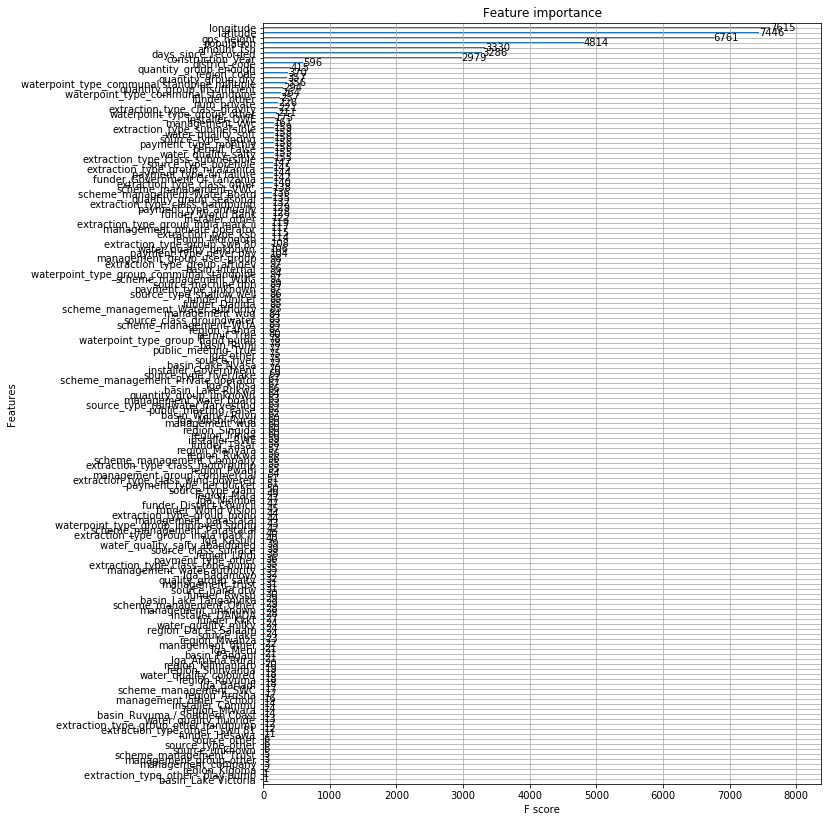

In [156]:
plot_features(xgb_model, (10,14))

In [81]:
# def model(X_train, X_test, y_train, y_test):
#     if __name__ == '__main__':
    
#         param_grid = {'learning_rate': [0.075, 0.05, 0.025],
#                       'max_depth': [4, 6, 8],
#                       'min_samples_leaf': [15, 16],
#                       'subsample': [0.8, 0.9, 1],
#                       'max_features': [1.0],
#                       'n_estimators': [1000, 500, 100],
#                       'gamma':[0,1,5]}                      

#         estimator = GridSearchCV(estimator=XGBClassifier(objective="multi:softprob", random_state=42),
#                                  param_grid=param_grid,
#                                  n_jobs=-1)

#         estimator.fit(X_train, y_train)

#         best_params = estimator.best_params_

#         print (best_params)
                                 
#         validation_accuracy = estimator.score(X_test, y_test)
#         print('Validation accuracy: ', validation_accuracy)

In [86]:
def model(X_train, X_test, y_train, y_test):
    if __name__ == '__main__':
    
        param_grid = {'learning_rate': [0.075],
                      'max_depth': [6],
                      'min_samples_leaf': [16],
                      'subsample': [0.8],
                      'max_features': [1.0],
                      'n_estimators': [1000],
                      'gamma':[1]}                      

        estimator = GridSearchCV(estimator=XGBClassifier(objective="multi:softprob", random_state=42),
                                 param_grid=param_grid,
                                 n_jobs=-1)

        estimator.fit(X_train, y_train)

        best_params = estimator.best_params_

        print (best_params)
                                 
        validation_accuracy = estimator.score(X_test, y_test)
        print('Validation accuracy: ', validation_accuracy)

In [89]:
model(X_train, X_test, y_train, y_test)

In [ ]:
def model_for_submission(features, target, test):
    if __name__ == '__main__':

         best_params = {'learning_rate': [0.075],
                        'max_depth': [14],
                        'min_samples_leaf': [16],
                        'max_features': [1.0],
                        'n_estimators': [100]}                      

         estimator = GridSearchCV(estimator=GradientBoostingClassifier(),
                                 param_grid=best_params,
                                 n_jobs=-1)

         estimator.fit(features, target)     

         predictions = estimator.predict(test)

         data = {'ID': test_id, 'status_group': predictions}

         submit = pd.DataFrame(data=data)

         vals_to_replace = {0:'functional', 1:'functional needs repair',
                           2:'non functional'}

         submit.status_group = submit.status_group.replace(vals_to_replace)        

         submit.to_csv('pump_predictions.csv', index=False)

In [ ]:
def feature_skewness(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 
                      'float16', 'float32', 'float64']
    numeric_features = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes: 
            numeric_features.append(i)

    feature_skew = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':feature_skew})
    return feature_skew, numeric_features

In [ ]:
def fix_skewness(df):
    feature_skew, numeric_features = feature_skewness(df)
    high_skew = feature_skew[feature_skew > 0.5]
    skew_index = high_skew.index
    
    for i in skew_index:
        df[i] = boxcox1p(df[i], boxcox_normmax(df[i]+1))

    skew_features = df[numeric_features].apply(
        lambda x: skew(x)).sort_values(ascending=False)
    skews = pd.DataFrame({'skew':skew_features})
    return df

In [ ]:
#transform target variable into categorical value